<a href="https://colab.research.google.com/github/taticorrea/monografia/blob/master/WD_RQ_NEWTON_TOV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando módulos
import math as mt                         #funções matemáticas nativas do Python
import numpy as np                        
import csv
import pandas as pd
import matplotlib.pyplot as plt           #módulo para plotar gráficos
from scipy.optimize import curve_fit      #modulo para fazer a regressao
%matplotlib inline
plt.style.use('seaborn-paper')

In [2]:
#Constantes no SI
c = 2.99792458E+8                                #m/s
me = 9.109389E-31                                #kg
mn = 1.674928E-27                                #kg
A_Z_He = 4/2 #2He
A_Z_C = 12/6 #12C
G = 6.67408E-11 #N.m²/kg²
Msol = 1.98892E+30 #kg
Rsol = 696340  #m
hbar = 1.054571726E-34                           #J.s
e_zero = ((me**4)*(c**5))/((mt.pi**2)*(hbar**3)) #J/m³
#e_zero = 1.42E+24     ARTIGO                    #erg/cm³

#EoS exata

In [3]:
k = 1E-23
delta = 1E-23
while k < 9*me*c: 
  x = k/(me*c) 
  e_C = ((x**3*(A_Z_C)*me**3*mn*c**5)/(3*np.pi**2*hbar**3))
  e_He =  (x**3*(A_Z_He)*me**3*mn*c**5)/(3*np.pi**2*hbar**3)
  P = (e_zero/24)*((2*x**3 - 3*x)*(1 + x**2)**(1/2) + 3*mt.asinh(x))
  with open('pressao_energia_C.csv', 'a', newline='') as file:
    writter = csv.writer(file)
    writter.writerow([k,x,e_C,P])
  with open('pressao_energia_He.csv', 'a', newline='') as file:
    writter = csv.writer(file)
    writter.writerow([k,x,e_He,P])
  #print(x,k)
  k = k + delta

pe_C = pd.read_csv('pressao_energia_C.csv', names=['k','x','dens. energia (J/m3)','pressao (N/m2)'])
pe_He = pd.read_csv('pressao_energia_He.csv', names=['k','x','dens. energia (J/m3)','pressao (N/m2)'])

In [4]:
pe_C

,k,x,dens. energia (J/m3),pressao (N/m2)
0,1.000000e-23,0.036618,8.669982e+21,6.319512e+14
1,2.000000e-23,0.073235,6.935985e+22,2.019348e+16
2,3.000000e-23,0.109853,2.340895e+23,1.529801e+17
3,4.000000e-23,0.146470,5.548788e+23,6.425284e+17
4,5.000000e-23,0.183088,1.083748e+24,1.952591e+18
...,...,...,...,...
240,2.410000e-21,8.824845,1.213582e+29,7.191445e+25
241,2.420000e-21,8.861463,1.228752e+29,7.312273e+25
242,2.430000e-21,8.898080,1.244048e+29,7.434614e+25
243,2.440000e-21,8.934698,1.259469e+29,7.558481e+25


In [ ]:
'''
k = np.arange(0,2*me*c + 5.4e-22,1e-23)
x = k/(2*me*c)


df = pd.DataFrame(columns=['k','e_C','e_He','P'])

df['k'] = k
df['e_C'] = (e_zero/8)*((2*x**3 + x)*((1  + x**2)**(1/2)) - np.arcsinh(x)) + (x**3*(A_Z_C)*me**3*mn*c**5)/(3*np.pi**2*hbar**3)
df['e_He'] = (e_zero/8)*((2*x**3 + x)*((1  + x**2)**(1/2)) - np.arcsinh(x)) + (x**3*(A_Z_He)*me**3*mn*c**5)/(3*np.pi**2*hbar**3)
df['P'] = (e_zero/24)*((2*x**3 - 3*x)*(1 + x**2)**(1/2) + 3*np.arcsinh(x))
'''

##fit

In [5]:
###################### Regressao linear (EoS) ######################
y_C = np.array(pe_C['dens. energia (J/m3)'])
x_C = np.array(pe_C['pressao (N/m2)'])

y_He = np.array(pe_He['dens. energia (J/m3)'])
x_He= np.array(pe_He['pressao (N/m2)'])
y_He = np.array(pe_He['dens. energia (J/m3)'])
x_He = np.array(pe_He['pressao (N/m2)'])

def fit_func(x, a, b):           #fit
    return a*(x**(3/5)) + b*(x**(3/4))        #a-> caso nao-rel     b-> caso rel

######### Ana branca C
pars_C, cov_C = curve_fit(fit_func, x_C, y_C,p0=[1E+12,1E+9])
stdevs_C = np.sqrt(np.diag(cov_C))   
Anrel_C = pars_C[0]
Arel_C = pars_C[1]


pars_He, cov_He = curve_fit(fit_func, x_He, y_He,p0=[1E+12,1E+9])
stdevs_He = np.sqrt(np.diag(cov_He))   
Anrel_He = pars_He[0]
Arel_He = pars_He[1]



######### Ana branca He
pars_He, cov_He = curve_fit(fit_func, x_He, y_He,p0=[1E+12,1E+9])
######### desvpad dos parametros 
stdevs_He = np.sqrt(np.diag(cov_He))   


Anrel_He = pars_He[0]
Arel_He = pars_He[1]





######### Print dos resultados
print('Ana Branca de C k[0,2mec]')
print('Parametros',pars_C)
print('Covariancia dos parametros',cov_C)
print('Erros dos parametros',stdevs_C)
print('\n')


print('Ana Branca de He')
print('Parametros',pars_He)
print('Covariancia dos parametros',cov_He)
print('Erros dos parametros',stdevs_He)

Ana Branca de C k[0,2mec]
Parametros [1.69209480e+12 4.68702176e+09]
Covariancia dos parametros [[ 7.18251510e+20 -1.02748708e+17]
 [-1.02748708e+17  1.48284968e+13]]
Erros dos parametros [2.68002147e+10 3.85077873e+06]


Ana Branca de He
Parametros [1.69209480e+12 4.68702176e+09]
Covariancia dos parametros [[ 7.18251510e+20 -1.02748708e+17]
 [-1.02748708e+17  1.48284968e+13]]
Erros dos parametros [2.68002147e+10 3.85077873e+06]


##PxE

###Regime qualquer

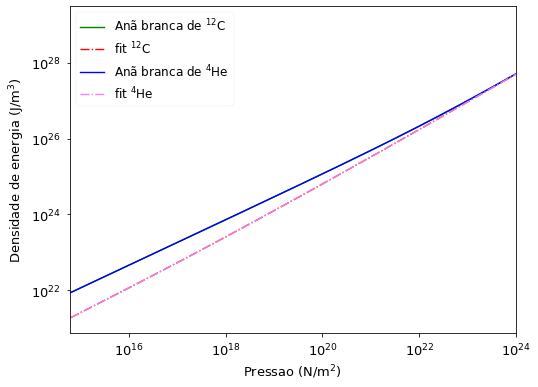

In [8]:
######### Plot
plt.figure(figsize=(8,6))
plt.plot(pe_C['pressao (N/m2)'], pe_C['dens. energia (J/m3)'], color = 'green', label = r'Anã branca de $^{12}$C', linestyle = '-')
plt.plot(x_C, fit_func(x_C, *pars_C), color = 'red', label = r'fit $^{12}$C', linestyle = '-.')

plt.plot(pe_He['pressao (N/m2)'], pe_He['dens. energia (J/m3)'], color = 'blue', label = r'Anã branca de $^{4}$He', linestyle = '-')
plt.plot(x_He, fit_func(x_He, *pars_He), color = 'violet', label = r'fit $^4$He', linestyle = '-.')

plt.ylabel(r'Densidade de energia (J/m$^{3}$)',size = 13)
plt.yscale('log')
plt.yticks(size = 13)
#plt.ylim(0,1.2e+28)

plt.xlim(6e+14,1e+24)
plt.xlabel(r'Pressao (N/m$^2$)',size = 13)
plt.xticks(size = 13)
plt.xscale('log')

plt.legend(prop={'size': 12})

plt.savefig('pxe_WD.png')
plt.show()

#Politrópico

####$\gamma$ = 4/3 (caso relativíístico)

In [9]:
a = hbar*c/(12*np.pi**2)
b = (3*np.pi**2*6/(12*mn*c**2))
krel = a*b**(4/3)
krel

1.2117706868491023e-13

####$\gamma$ = 5/3 (caso não relativíístico)

In [10]:
a = hbar**2/(15*np.pi**2*me)
b = (3*np.pi**2*6/(12*mn*c**2))
knaorel = a*b**(5/3)
knaorel

1.727936401002414e-22

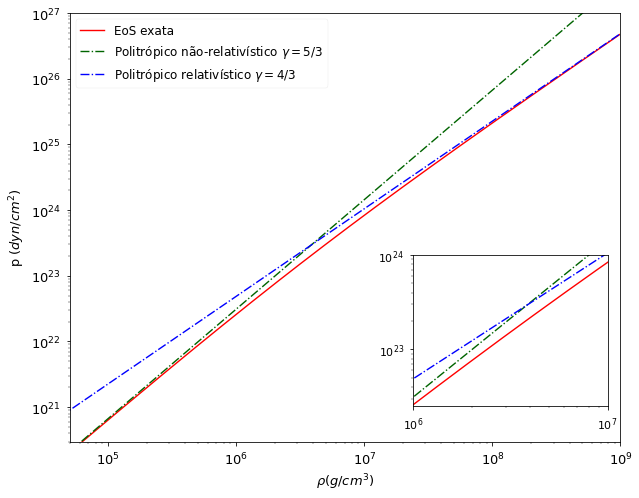

In [14]:
fig = plt.figure(figsize=(9,7))
ax1 = fig.add_axes([0.1, 0.1, 0.85, 0.85])
ax2 = fig.add_axes([0.63, 0.17, 0.3, 0.3])

ax1.plot(pe_C['dens. energia (J/m3)']*1e-3/c**2, pe_C['pressao (N/m2)']*10, color = 'red', label = r'EoS exata',ls='-')
ax1.plot(pe_C['dens. energia (J/m3)']*1e-3/c**2,knaorel*pe_C['dens. energia (J/m3)']**(5/3)*10, ls='-.',color='darkgreen', label='Politrópico não-relativístico $\gamma = 5/3$')
ax1.plot(pe_C['dens. energia (J/m3)']*1e-3/c**2,krel*pe_C['dens. energia (J/m3)']**(4/3)*10, ls='-.',color='blue', label='Politrópico relativístico $\gamma = 4/3$')

ax1.set_xlabel(r'$\rho (g/cm^3)$', size = 13)
ax1.set_xscale('log')
ax1.set_xlim([5e+4,1e+9])
ax1.tick_params(axis = 'x', labelsize = 13)

ax1.set_ylabel('p $(dyn/cm^2)$', size = 13)
ax1.set_yscale('log')
ax1.set_ylim([3e+20,1e+27])
ax1.tick_params(axis = 'y', labelsize = 13)

ax1.legend(loc=2,prop= {'size':12})


ax2.plot(pe_C['dens. energia (J/m3)']*1e-3/c**2, pe_C['pressao (N/m2)']*10, color = 'red', label = r'EoS exata')
ax2.plot(pe_C['dens. energia (J/m3)']*1e-3/c**2,knaorel*pe_C['dens. energia (J/m3)']**(5/3)*10, ls='-.',color='darkgreen')
ax2.plot(pe_C['dens. energia (J/m3)']*1e-3/c**2,krel*pe_C['dens. energia (J/m3)']**(4/3)*10, ls='-.',color='blue')

ax2.set_xscale('log')
ax2.set_xlim([1e+6,1e+7])
ax2.tick_params(axis = 'x', labelsize = 11)


ax2.set_yscale('log')
ax2.set_ylim([2.5e+22,1e+24])
ax2.tick_params(axis = 'y', labelsize = 11)

#ax2.grid(True)

plt.savefig('pxe-politropico_exata_WD.png')

##NEWTON

In [ ]:
h = 500 #m
def f(R,P,M): #dp/dr
    e_C = Anrel_C*(P**(3/5)) +  Arel_C*(P**(3/4)) #
    #e_He = Anrel_He*(P**(3/5)) + Arel_He*(P**(3/4))
    f = -G*M/(c**2*R**2)
    return f*e_C
def g(R,P,M): #dm/dr
    e_C = Anrel_C*(P**(3/5)) +  Arel_C*(P**(3/4)) #
    #e_He = Anrel_He*(P**(3/5)) + Arel_He*(P**(3/4))
    f = (4*np.pi*R**2)/(c**2)
    return f*e_C

#Condicoes iniciais
R = 1e-2
M = 1e-2
P = 1E+25

with open('WD-NEWTON_regimequalquer-25.csv', 'a', newline='') as file:
  writter = csv.writer(file)
  writter.writerow(['p (N/m2)','m (Msol)','R (km)'])
while P > 0:
  k1P = h*f(R,       P,              M )    
  k1M = h*g(R,       P,              M)
  k2P = h*f(R + h/2, P + k1P/2, M + k1M/2)  
  k2M = h*g(R + h/2, P + k1P/2, M + k1M/2)
  k3P = h*f(R + h/2, P + k2P/2, M + k2M/2)
  k3M = h*g(R + h/2, P + k2P/2, M + k2M/2)
  k4P = h*f(R + h,   P + k3P, M + k3M)
  k4M = h*g(R + h,   P + k3P, M + k3M)
  with open('WD-NEWTON_regimequalquer-25.csv', 'a', newline='') as file:
    writter = csv.writer(file)
    writter.writerow([P,M/Msol,R*1E-3])      
    #Calculando P+1, M+1 e R
    P = P + (1/6)*(k1P + 2*k2P + 2*k3P + k4P)
    M = M + (1/6)*(k1M + 2*k2M + 2*k3M + k4M)
    R = R + h
    print('P (N/m2):','{:e}'.format(P),' M (Msol):',M/Msol,'  R (km):',R*1E-3)

In [ ]:
WD_21_NEWTON = pd.read_csv('WD-NEWTON_regimequalquer-21.csv')
WD_22_NEWTON = pd.read_csv('WD-NEWTON_regimequalquer-22.csv')
WD_23_NEWTON = pd.read_csv('WD-NEWTON_regimequalquer-23.csv')
WD_24_NEWTON = pd.read_csv('WD-NEWTON_regimequalquer-24.csv')
WD_25_NEWTON = pd.read_csv('WD-NEWTON_regimequalquer-25.csv')

##TOV

In [ ]:
h = 500 #m
def f(R,P,M): #dp/dr = -GMe/c²r²[1 + p/e][1 + 4pir³/(Mc²)][1 - 2GM/(c²r²)] = -ABCD
  e_C = Anrel_C*(P**(3/5)) + Arel_C*(P**(3/4))  #
  #e_He = Anrel_He*(P**(3/5)) + Arel_He*(P**(3/4)) #
  A_C = G*e_C*M/(c**2*R**2)
  #A_He = G*e_He*M/(c**2*R**2)
  B_C = 1 + P/e_C
  #B_He = 1 + P/e_He
  C = 1 + 4*np.pi*R**3*P/(M*c**2)
  D = (1 - 2*G*M/(c**2*R))**(-1)
  return -A_C*B_C*C*D
def g(R,P,M): #dm/dr = 4pir²e/c²
  e_C = Anrel_C*(P**(3/5)) + Arel_C*(P**(3/4))    #
  #e_He = Anrel_He*(P**(3/5)) + Arel_He*(P**(3/4)) #
  f = (4*np.pi*R**2)/(c**2)
  return f*e_C

#Condicoes iniciais
R = 1e-2
M = 1e-2
P = 4E+33

with open('WD-TOV_regimequalquer-4e33.csv', 'a', newline='') as file:
  writter = csv.writer(file)
  writter.writerow(['p (N/m2)','m (Msol)','R (km)'])
while P > 0:
  k1P = h*f(R,       P,              M )    
  k1M = h*g(R,       P,              M)
  k2P = h*f(R + h/2, P + k1P/2, M + k1M/2)  
  k2M = h*g(R + h/2, P + k1P/2, M + k1M/2)
  k3P = h*f(R + h/2, P + k2P/2, M + k2M/2)
  k3M = h*g(R + h/2, P + k2P/2, M + k2M/2)
  k4P = h*f(R + h,   P + k3P, M + k3M)
  k4M = h*g(R + h,   P + k3P, M + k3M)
  
  with open('WD-TOV_regimequalquer-4e33.csv', 'a', newline='') as file:
    writter = csv.writer(file)
    writter.writerow([P,M/Msol,R*1E-3])      
    #Calculando P+1, M+1 e R
  

  P = P + (1/6)*(k1P + 2*k2P + 2*k3P + k4P)
  M = M + (1/6)*(k1M + 2*k2M + 2*k3M + k4M)
  R = R + h

  #print('k1P:','{:e}'.format(k1P),'k2P:','{:e}'.format(k2P),'k3P:','{:e}'.format(k3P),'k4P:','{:e}'.format(k4P))
  #print('k1M:','{:e}'.format(k1M),'k2M:','{:e}'.format(k2M),'k3M:','{:e}'.format(k3M),'k4M:','{:e}'.format(k4M))
  print('P (N/m2):','{:e}'.format(P),' M (Msol):',M/Msol,'  R (km):',R*1E-3)
  print('\n')

In [ ]:
#WD_18_TOV = pd.read_csv('WD-TOV_regimequalquer-18.csv')
#WD_19_TOV = pd.read_csv('WD-TOV_regimequalquer-19.csv')
#WD_20_TOV = pd.read_csv('WD-TOV_regimequalquer-20.csv')
WD_21_TOV = pd.read_csv('WD-TOV_regimequalquer-21.csv')
WD_2e21_TOV = pd.read_csv('WD-TOV_regimequalquer-2e21.csv')
WD_4e21_TOV = pd.read_csv('WD-TOV_regimequalquer-4e21.csv')

WD_22_TOV = pd.read_csv('WD-TOV_regimequalquer-22.csv')
WD_2e22_TOV = pd.read_csv('WD-TOV_regimequalquer-2e22.csv')
WD_4e22_TOV = pd.read_csv('WD-TOV_regimequalquer-4e22.csv')

WD_23_TOV = pd.read_csv('WD-TOV_regimequalquer-23.csv')
WD_2e23_TOV = pd.read_csv('WD-TOV_regimequalquer-2e23.csv')
WD_4e23_TOV = pd.read_csv('WD-TOV_regimequalquer-4e23.csv')

WD_24_TOV = pd.read_csv('WD-TOV_regimequalquer-24.csv')
WD_2e24_TOV = pd.read_csv('WD-TOV_regimequalquer-2e24.csv')
WD_4e24_TOV = pd.read_csv('WD-TOV_regimequalquer-4e24.csv')

WD_25_TOV = pd.read_csv('WD-TOV_regimequalquer-25.csv')
WD_2e25_TOV = pd.read_csv('WD-TOV_regimequalquer-2e25.csv')
WD_4e25_TOV = pd.read_csv('WD-TOV_regimequalquer-4e25.csv')

WD_26_TOV = pd.read_csv('WD-TOV_regimequalquer-26.csv')
WD_2e26_TOV = pd.read_csv('WD-TOV_regimequalquer-2e26.csv')
WD_4e26_TOV = pd.read_csv('WD-TOV_regimequalquer-4e26.csv')

WD_27_TOV = pd.read_csv('WD-TOV_regimequalquer-27.csv')
WD_2e27_TOV = pd.read_csv('WD-TOV_regimequalquer-2e27.csv')
WD_4e27_TOV = pd.read_csv('WD-TOV_regimequalquer-4e27.csv')

WD_28_TOV = pd.read_csv('WD-TOV_regimequalquer-28.csv')
WD_2e28_TOV = pd.read_csv('WD-TOV_regimequalquer-2e28.csv')
WD_4e28_TOV = pd.read_csv('WD-TOV_regimequalquer-4e28.csv')

WD_29_TOV = pd.read_csv('WD-TOV_regimequalquer-29.csv')
WD_2e29_TOV = pd.read_csv('WD-TOV_regimequalquer-2e29.csv')
WD_4e29_TOV = pd.read_csv('WD-TOV_regimequalquer-4e29.csv')

WD_30_TOV = pd.read_csv('WD-TOV_regimequalquer-30.csv')
WD_2e30_TOV = pd.read_csv('WD-TOV_regimequalquer-2e30.csv')
WD_4e30_TOV = pd.read_csv('WD-TOV_regimequalquer-4e30.csv')

WD_31_TOV = pd.read_csv('WD-TOV_regimequalquer-31.csv')
WD_2e31_TOV = pd.read_csv('WD-TOV_regimequalquer-2e31.csv')
WD_4e31_TOV = pd.read_csv('WD-TOV_regimequalquer-4e31.csv')

WD_32_TOV = pd.read_csv('WD-TOV_regimequalquer-32.csv')
WD_2e32_TOV = pd.read_csv('WD-TOV_regimequalquer-2e32.csv')
WD_4e32_TOV = pd.read_csv('WD-TOV_regimequalquer-4e32.csv')

WD_33_TOV = pd.read_csv('WD-TOV_regimequalquer-33.csv')
WD_2e33_TOV = pd.read_csv('WD-TOV_regimequalquer-2e33.csv')
WD_4e33_TOV = pd.read_csv('WD-TOV_regimequalquer-4e33.csv')

WD_34_TOV = pd.read_csv('WD-TOV_regimequalquer-34.csv')
WD_2e34_TOV = pd.read_csv('WD-TOV_regimequalquer-2e34.csv')
WD_4e34_TOV = pd.read_csv('WD-TOV_regimequalquer-4e34.csv')

#passo

In [ ]:
passo = [100e+3,50e+3,20e+3,10e+3,5e+3,2e+3,1e+3,50,20,10]
massa = [1.3058027718590748,1.3057903428441846,1.3058174909391382,1.3058212512365333,1.3058220602568336,1.305822293188659,1.305822325324642,1.3058223360588526,1.3058223360812125,1.3058223360843726]
raio = [3900.0000099999997,3950.0000099999997,4020.0000099999997,4050.0000099999997,4055.0000099999997,4062.0000099999997,4063.0000099999997,4064.90001,4064.96001,4064.9800099999998]

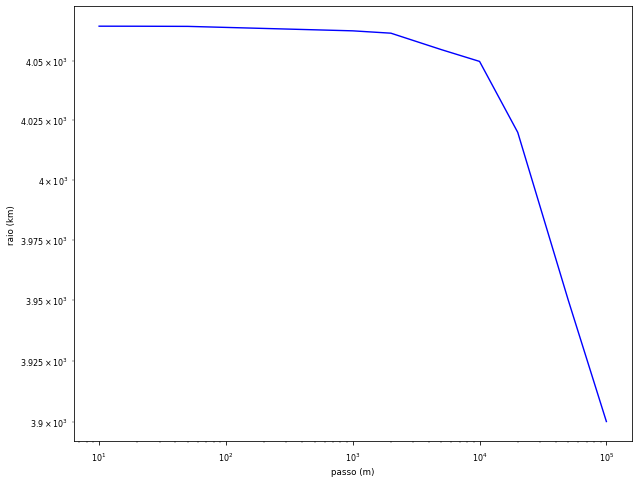

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,8))
plt.plot(passo,raio,color='blue',ls='-')
plt.xlabel('passo (m)')
plt.ylabel('raio (km)')
plt.yscale('log')
#plt.yticks(np.arange(3.9,4.3,0.1))
plt.xscale('log')
#plt.xlim(1.305,1.306)
plt.savefig('passoxraio.png')

plt.show()

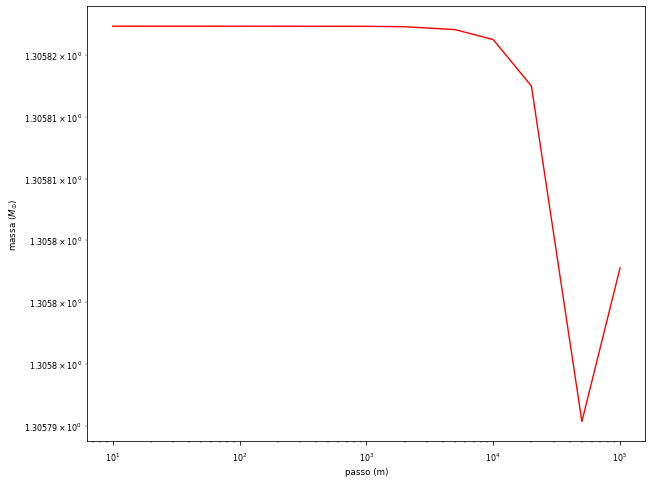

In [ ]:
%matplotlib inline

plt.figure(figsize=(10,8))
plt.plot(passo,massa, color='red')
plt.xlabel('passo (m)')
plt.ylabel(r'massa $(M_{\odot})$')
plt.yscale('log')
plt.xscale('log')
plt.savefig('passoxmassa.png')
#plt.xlim(1.305,1.306)

plt.show()

#PLOTS

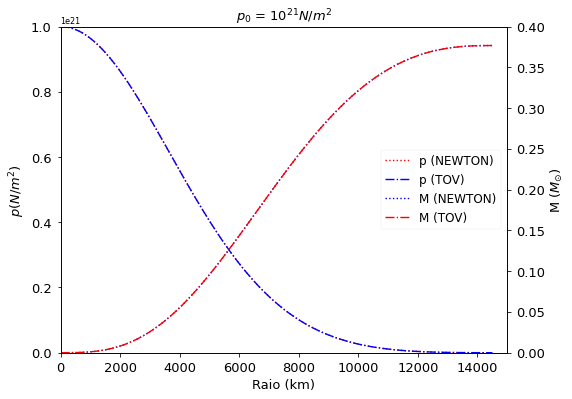

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p_0$ = 10$^{21} N/m^2$', size = 13)
lns1 = ax.plot(WD_21_NEWTON['R (km)'],WD_21_NEWTON['p (N/m2)'],color ='red', linestyle=':', label = r'p (NEWTON)')
lns2 = ax.plot(WD_21_TOV['R (km)'],WD_21_TOV['p (N/m2)'],color ='blue', linestyle='-.', label = r'p (TOV)')

ax.tick_params(axis = 'y', labelsize = 13)
ax.tick_params(axis = 'x', labelsize = 13)

plt.ylim(0,1e+21)
plt.xlim(0,15e+3)

ax.set_ylabel(r'$p (N/m^2)$', size = 13)



ax2 = ax.twinx()
lns3 = ax2.plot(WD_21_NEWTON['R (km)'],WD_21_NEWTON['m (Msol)'],color ='blue',linestyle=':', label = r'M (NEWTON)')
lns4 = ax2.plot(WD_21_TOV['R (km)'],WD_21_TOV['m (Msol)'],color ='red', linestyle='-.', label = r'M (TOV)')
ax2.set_ylabel(r'M $(M_{\odot})$', size = 13)
ax.set_xlabel('Raio (km)', size = 13)
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
plt.ylim(0,0.4)

ax2.tick_params(axis = 'x', labelsize = 13)
ax2.tick_params(axis = 'y', labelsize = 13)


ax.legend(lns, labs, loc=5,prop={'size':12})

fig.savefig('WD_regimequalquer-21.png')

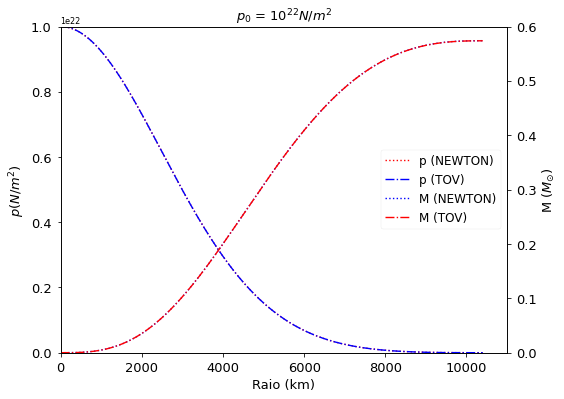

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p_0$ = 10$^{22} N/m^2$', size = 13)
lns1 = ax.plot(WD_22_NEWTON['R (km)'],WD_22_NEWTON['p (N/m2)'],color ='red', linestyle=':', label = r'p (NEWTON)')
lns2 = ax.plot(WD_22_TOV['R (km)'],WD_22_TOV['p (N/m2)'],color ='blue', linestyle='-.', label = r'p (TOV)')
plt.ylim(0,1e+22)
plt.xlim(0,11e+3)
ax.tick_params(axis = 'x', labelsize = 13)
ax.tick_params(axis = 'y', labelsize = 13)


ax.set_ylabel(r'$p (N/m^2)$', size = 13)

ax2 = ax.twinx()
lns3 = ax2.plot(WD_22_NEWTON['R (km)'],WD_22_NEWTON['m (Msol)'],color ='blue',linestyle=':', label = r'M (NEWTON)')
lns4 = ax2.plot(WD_22_TOV['R (km)'],WD_22_TOV['m (Msol)'],color ='red', linestyle='-.', label = r'M (TOV)')
ax2.set_ylabel(r'M $(M_{\odot})$', size = 13)
ax.set_xlabel('Raio (km)', size = 13)
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=5,prop={'size':12})
plt.ylim(0,0.6)
ax2.tick_params(axis = 'x', labelsize = 13)
ax2.tick_params(axis = 'y', labelsize = 13)

fig.savefig('WD_regimequalquer-22.png')

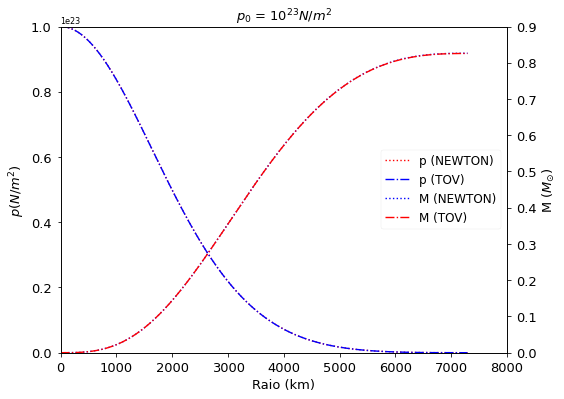

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p_0$ = 10$^{23} N/m^2$', size = 13)
lns1 = ax.plot(WD_23_NEWTON['R (km)'],WD_23_NEWTON['p (N/m2)'],color ='red', linestyle=':', label = r'p (NEWTON)')
lns2 = ax.plot(WD_23_TOV['R (km)'],WD_23_TOV['p (N/m2)'],color ='blue', linestyle='-.', label = r'p (TOV)')
plt.ylim(0,1e+23)
plt.xlim(0,8e+3)
ax.set_ylabel(r'$p (N/m^2)$', size = 13)
ax.tick_params(axis = 'x', labelsize = 13)
ax.tick_params(axis = 'y', labelsize = 13)

ax2 = ax.twinx()
lns3 = ax2.plot(WD_23_NEWTON['R (km)'],WD_23_NEWTON['m (Msol)'],color ='blue',linestyle=':', label = r'M (NEWTON)')
lns4 = ax2.plot(WD_23_TOV['R (km)'],WD_23_TOV['m (Msol)'],color ='red', linestyle='-.', label = r'M (TOV)')
ax2.set_ylabel(r'M $(M_{\odot})$', size = 13)
ax.set_xlabel('Raio (km)', size = 13)
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=5,prop={'size':12})
plt.ylim(0,0.9)
ax2.tick_params(axis = 'x', labelsize = 13)
ax2.tick_params(axis = 'y', labelsize = 13)

fig.savefig('WD_regimequalquer-23.png')

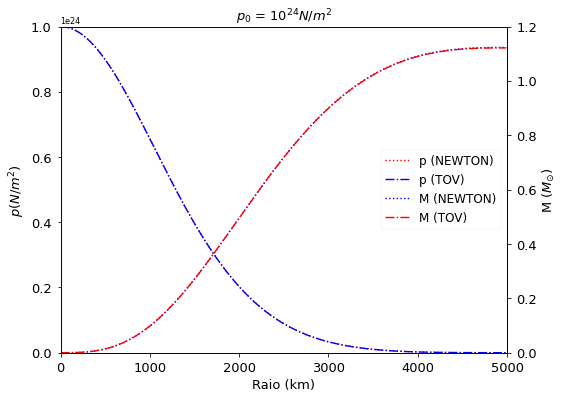

In [ ]:
fig = plt.figure(figsize = (8,6))
ax = fig.add_subplot(111)

ax.set_title(r'$p_0$ = 10$^{24} N/m^2$', size = 13)
lns1 = ax.plot(WD_24_NEWTON['R (km)'],WD_24_NEWTON['p (N/m2)'],color ='red', linestyle=':', label = r'p (NEWTON)')
lns2 = ax.plot(WD_24_TOV['R (km)'],WD_24_TOV['p (N/m2)'],color ='blue', linestyle='-.', label = r'p (TOV)')
plt.ylim(0,1e+24)
plt.xlim(0,5e+3)
ax.set_ylabel(r'$p (N/m^2)$', size = 13)
ax.tick_params(axis = 'x', labelsize = 13)
ax.tick_params(axis = 'y', labelsize = 13)

ax2 = ax.twinx()
lns3 = ax2.plot(WD_24_NEWTON['R (km)'],WD_24_NEWTON['m (Msol)'],color ='blue',linestyle=':', label = r'M (NEWTON)')
lns4 = ax2.plot(WD_24_TOV['R (km)'],WD_24_TOV['m (Msol)'],color ='red', linestyle='-.', label = r'M (TOV)')
ax2.set_ylabel(r'M $(M_{\odot})$', size = 13)
ax.set_xlabel('Raio (km)', size = 13)
lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=5,prop={'size':12})
plt.ylim(0,1.2)
ax2.tick_params(axis = 'x', labelsize = 13)
ax2.tick_params(axis = 'y', labelsize = 13)

fig.savefig('WD_regimequalquer-24.png')

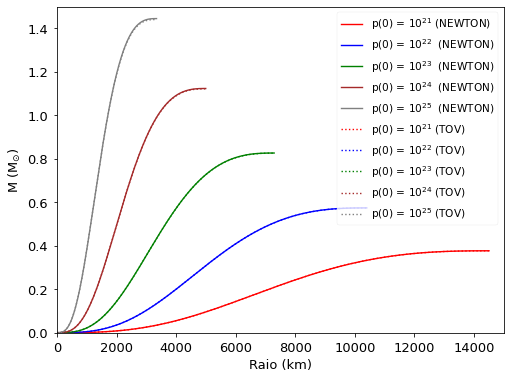

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(WD_21_NEWTON['R (km)'],WD_21_NEWTON['m (Msol)'],color ='red',label =r'p(0) = $10^{21}$ (NEWTON)', linestyle='-')
plt.plot(WD_22_NEWTON['R (km)'],WD_22_NEWTON['m (Msol)'],color ='blue',label =r'p(0) = $10^{22}$  (NEWTON)', linestyle='-')
plt.plot(WD_23_NEWTON['R (km)'],WD_23_NEWTON['m (Msol)'],color ='green',label =r'p(0) = $10^{23}$  (NEWTON)', linestyle='-')
plt.plot(WD_24_NEWTON['R (km)'],WD_24_NEWTON['m (Msol)'],color ='brown',label =r'p(0) = $10^{24}$  (NEWTON)', linestyle='-')
plt.plot(WD_25_NEWTON['R (km)'],WD_25_NEWTON['m (Msol)'],color ='grey',label =r'p(0) = $10^{25}$  (NEWTON)', linestyle='-')

plt.plot(WD_21_TOV['R (km)'],WD_21_TOV['m (Msol)'],color ='red',label =r'p(0) = $10^{21}$ (TOV)', linestyle=':')
plt.plot(WD_22_TOV['R (km)'],WD_22_TOV['m (Msol)'],color ='blue',label =r'p(0) = $10^{22}$ (TOV)', linestyle=':')
plt.plot(WD_23_TOV['R (km)'],WD_23_TOV['m (Msol)'],color ='green',label =r'p(0) = $10^{23}$ (TOV)', linestyle=':')
plt.plot(WD_24_TOV['R (km)'],WD_24_TOV['m (Msol)'],color ='brown',label =r'p(0) = $10^{24}$ (TOV)', linestyle=':')
plt.plot(WD_25_TOV['R (km)'],WD_25_TOV['m (Msol)'],color ='grey',label =r'p(0) = $10^{25}$ (TOV)', linestyle=':')
#plt.plot(WD_26_TOV['R (km)'],WD_26_TOV['m (Msol)'],color ='grey',label =r'p(0) = $10^{26}$ (TOV)', linestyle=':')
#plt.plot(WD_27_TOV['R (km)'],WD_27_TOV['m (Msol)'],color ='grey',label =r'p(0) = $10^{27}$ (TOV)', linestyle=':')
#plt.plot(WD_28_TOV['R (km)'],WD_28_TOV['m (Msol)'],color ='grey',label =r'p(0) = $10^{28}$ (TOV)', linestyle=':')
#plt.plot(WD_29_TOV['R (km)'],WD_29_TOV['m (Msol)'],color ='grey',label =r'p(0) = $10^{29}$ (TOV)', linestyle=':')
#plt.plot(WD_30_TOV['R (km)'],WD_30_TOV['m (Msol)'],color ='grey',label =r'p(0) = $10^{30}$ (TOV)', linestyle=':')
#plt.plot(WD_31_TOV['R (km)'],WD_31_TOV['m (Msol)'],color ='grey',label =r'p(0) = $10^{31}$ (TOV)', linestyle=':')
#plt.plot(WD_32_TOV['R (km)'],WD_32_TOV['m (Msol)'],color ='grey',label =r'p(0) = $10^{32}$ (TOV)', linestyle=':')
#plt.plot(WD_33_TOV['R (km)'],WD_33_TOV['m (Msol)'],color ='grey',label =r'p(0) = $10^{33}$ (TOV)', linestyle=':')
#plt.plot(WD_34_TOV['R (km)'],WD_34_TOV['m (Msol)'],color ='grey',label =r'p(0) = $10^{34}$ (TOV)', linestyle=':')

plt.yticks(size = 13)
plt.xticks(size = 13)


plt.ylabel(r'M (M$_{\odot}$)', size = 13)
plt.ylim(0,1.5)
plt.xlim(0,15e+3)
plt.xlabel('Raio (km)', size = 13)
plt.legend(loc = 1, prop = {'size':10.5})
plt.savefig('rM_regimequalquer-all-WD.png')
plt.show()

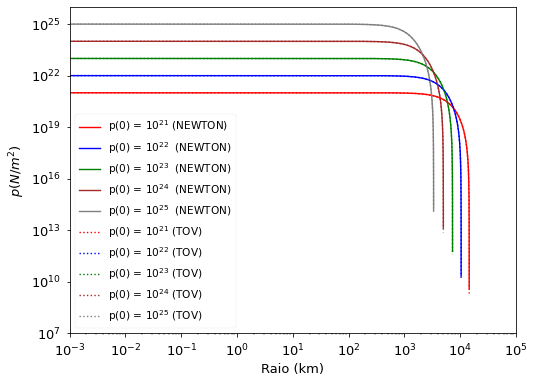

In [ ]:
plt.figure(figsize = (8,6))
plt.plot(WD_21_NEWTON['R (km)'],WD_21_NEWTON['p (N/m2)'],color ='red',label =r'p(0) = $10^{21}$ (NEWTON)', linestyle='-')
plt.plot(WD_22_NEWTON['R (km)'],WD_22_NEWTON['p (N/m2)'],color ='blue',label =r'p(0) = $10^{22}$  (NEWTON)', linestyle='-')
plt.plot(WD_23_NEWTON['R (km)'],WD_23_NEWTON['p (N/m2)'],color ='green',label =r'p(0) = $10^{23}$  (NEWTON)', linestyle='-')
plt.plot(WD_24_NEWTON['R (km)'],WD_24_NEWTON['p (N/m2)'],color ='brown',label =r'p(0) = $10^{24}$  (NEWTON)', linestyle='-')
plt.plot(WD_25_NEWTON['R (km)'],WD_25_NEWTON['p (N/m2)'],color ='grey',label =r'p(0) = $10^{25}$  (NEWTON)', linestyle='-')

plt.plot(WD_21_TOV['R (km)'],WD_21_TOV['p (N/m2)'],color ='red',label =r'p(0) = $10^{21}$ (TOV)', linestyle=':')
plt.plot(WD_22_TOV['R (km)'],WD_22_TOV['p (N/m2)'],color ='blue',label =r'p(0) = $10^{22}$ (TOV)', linestyle=':')
plt.plot(WD_23_TOV['R (km)'],WD_23_TOV['p (N/m2)'],color ='green',label =r'p(0) = $10^{23}$ (TOV)', linestyle=':')
plt.plot(WD_24_TOV['R (km)'],WD_24_TOV['p (N/m2)'],color ='brown',label =r'p(0) = $10^{24}$ (TOV)', linestyle=':')
plt.plot(WD_25_TOV['R (km)'],WD_25_TOV['p (N/m2)'],color ='grey',label =r'p(0) = $10^{25}$ (TOV)', linestyle=':')

plt.yticks(size = 13)
plt.xticks(size = 13)


plt.ylabel(r'$p (N/m^2)$', size = 13)
plt.axis([1E-3,1E+5,1E+7,1E+26])
#plt.grid(True)
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Raio (km)', size = 13)
plt.legend(loc = 3, prop = {'size':10.5})
plt.savefig('rP_regimequalquer-all-WD.png')
plt.show()

#Massa-Raio

In [ ]:
WD_regimequalquer_TOV = pd.DataFrame(columns=['m (Msol)','R (km)','p (N/m2)'])
WD_regimequalquer_TOV['m (Msol)'] = float(list(WD_21_TOV['m (Msol)'])[-1]),float(list(WD_2e21_TOV['m (Msol)'])[-1]),float(list(WD_4e21_TOV['m (Msol)'])[-1]),float(list(WD_22_TOV['m (Msol)'])[-1]),float(list(WD_2e22_TOV['m (Msol)'])[-1]),float(list(WD_4e22_TOV['m (Msol)'])[-1]),float(list(WD_23_TOV['m (Msol)'])[-1]),float(list(WD_2e23_TOV['m (Msol)'])[-1]),float(list(WD_4e23_TOV['m (Msol)'])[-1]),float(list(WD_24_TOV['m (Msol)'])[-1]),float(list(WD_2e24_TOV['m (Msol)'])[-1]),float(list(WD_4e24_TOV['m (Msol)'])[-1]),float(list(WD_25_TOV['m (Msol)'])[-1]),float(list(WD_2e25_TOV['m (Msol)'])[-1]),float(list(WD_4e25_TOV['m (Msol)'])[-1]),float(list(WD_26_TOV['m (Msol)'])[-1]),float(list(WD_2e26_TOV['m (Msol)'])[-1]),float(list(WD_4e26_TOV['m (Msol)'])[-1]),float(list(WD_27_TOV['m (Msol)'])[-1]),float(list(WD_2e27_TOV['m (Msol)'])[-1]),float(list(WD_4e27_TOV['m (Msol)'])[-1]),float(list(WD_28_TOV['m (Msol)'])[-1]),float(list(WD_2e28_TOV['m (Msol)'])[-1]),float(list(WD_4e28_TOV['m (Msol)'])[-1]),float(list(WD_29_TOV['m (Msol)'])[-1]),float(list(WD_2e29_TOV['m (Msol)'])[-1]),float(list(WD_4e29_TOV['m (Msol)'])[-1]),float(list(WD_30_TOV['m (Msol)'])[-1]),float(list(WD_2e30_TOV['m (Msol)'])[-1]),float(list(WD_4e30_TOV['m (Msol)'])[-1]),float(list(WD_31_TOV['m (Msol)'])[-1]),float(list(WD_2e31_TOV['m (Msol)'])[-1]),float(list(WD_4e31_TOV['m (Msol)'])[-1]),float(list(WD_32_TOV['m (Msol)'])[-1]),float(list(WD_2e32_TOV['m (Msol)'])[-1]),float(list(WD_4e32_TOV['m (Msol)'])[-1]),float(list(WD_33_TOV['m (Msol)'])[-1]),float(list(WD_2e33_TOV['m (Msol)'])[-1]),float(list(WD_4e33_TOV['m (Msol)'])[-1]),float(list(WD_34_TOV['m (Msol)'])[-1]),float(list(WD_2e34_TOV['m (Msol)'])[-1]),float(list(WD_4e34_TOV['m (Msol)'])[-1])
#,float(list(WD_26_TOV['m (Msol)'])[-1]),float(list(WD_27_TOV['m (Msol)'])[-1]),float(list(WD_28_TOV['m (Msol)'])[-1]),float(list(WD_29_TOV['m (Msol)'])[-1]),float(list(WD_30_TOV['m (Msol)'])[-1]),float(list(WD_31_TOV['m (Msol)'])[-1]),float(list(WD_32_TOV['m (Msol)'])[-1]),float(list(WD_33_TOV['m (Msol)'])[-1]),float(list(WD_34_TOV['m (Msol)'])[-1])
#float(list(WD_18_TOV['m (Msol)'])[-1]),float(list(WD_19_TOV['m (Msol)'])[-1]),float(list(WD_20_TOV['m (Msol)'])[-1]),
#

In [ ]:
WD_regimequalquer_TOV['R (km)'] = float(list(WD_21_TOV['R (km)'])[-1]),float(list(WD_2e21_TOV['R (km)'])[-1]),float(list(WD_4e21_TOV['R (km)'])[-1]),float(list(WD_22_TOV['R (km)'])[-1]),float(list(WD_2e22_TOV['R (km)'])[-1]),float(list(WD_4e22_TOV['R (km)'])[-1]),float(list(WD_23_TOV['R (km)'])[-1]),float(list(WD_2e23_TOV['R (km)'])[-1]),float(list(WD_4e23_TOV['R (km)'])[-1]),float(list(WD_24_TOV['R (km)'])[-1]),float(list(WD_2e24_TOV['R (km)'])[-1]),float(list(WD_4e24_TOV['R (km)'])[-1]),float(list(WD_25_TOV['R (km)'])[-1]),float(list(WD_2e25_TOV['R (km)'])[-1]),float(list(WD_4e25_TOV['R (km)'])[-1]),float(list(WD_26_TOV['R (km)'])[-1]),float(list(WD_2e26_TOV['R (km)'])[-1]),float(list(WD_4e26_TOV['R (km)'])[-1]),float(list(WD_27_TOV['R (km)'])[-1]),float(list(WD_2e27_TOV['R (km)'])[-1]),float(list(WD_4e27_TOV['R (km)'])[-1]),float(list(WD_28_TOV['R (km)'])[-1]),float(list(WD_2e28_TOV['R (km)'])[-1]),float(list(WD_4e28_TOV['R (km)'])[-1]),float(list(WD_29_TOV['R (km)'])[-1]),float(list(WD_2e29_TOV['R (km)'])[-1]),float(list(WD_4e29_TOV['R (km)'])[-1]),float(list(WD_30_TOV['R (km)'])[-1]),float(list(WD_2e30_TOV['R (km)'])[-1]),float(list(WD_4e30_TOV['R (km)'])[-1]),float(list(WD_31_TOV['R (km)'])[-1]),float(list(WD_2e31_TOV['R (km)'])[-1]),float(list(WD_4e31_TOV['R (km)'])[-1]),float(list(WD_32_TOV['R (km)'])[-1]),float(list(WD_2e32_TOV['R (km)'])[-1]),float(list(WD_4e32_TOV['R (km)'])[-1]),float(list(WD_33_TOV['R (km)'])[-1]),float(list(WD_2e33_TOV['R (km)'])[-1]),float(list(WD_4e33_TOV['R (km)'])[-1]),float(list(WD_34_TOV['R (km)'])[-1]),float(list(WD_2e34_TOV['R (km)'])[-1]),float(list(WD_4e34_TOV['R (km)'])[-1])
#float(list(WD_18_TOV['R (km)'])[-1]),float(list(WD_19_TOV['R (km)'])[-1]),
#
#

In [ ]:
WD_regimequalquer_TOV['p (N/m2)'] = float(list(WD_21_TOV['p (N/m2)'])[0]),float(list(WD_2e21_TOV['p (N/m2)'])[0]),float(list(WD_4e21_TOV['p (N/m2)'])[0]),float(list(WD_22_TOV['p (N/m2)'])[0]),float(list(WD_2e22_TOV['p (N/m2)'])[0]),float(list(WD_4e22_TOV['p (N/m2)'])[0]),float(list(WD_23_TOV['p (N/m2)'])[0]),float(list(WD_2e23_TOV['p (N/m2)'])[0]),float(list(WD_4e23_TOV['p (N/m2)'])[0]),float(list(WD_24_TOV['p (N/m2)'])[0]),float(list(WD_2e24_TOV['p (N/m2)'])[0]),float(list(WD_4e24_TOV['p (N/m2)'])[0]),float(list(WD_25_TOV['p (N/m2)'])[0]),float(list(WD_2e25_TOV['p (N/m2)'])[0]),float(list(WD_4e25_TOV['p (N/m2)'])[0]),float(list(WD_26_TOV['p (N/m2)'])[0]),float(list(WD_2e26_TOV['p (N/m2)'])[0]),float(list(WD_4e26_TOV['p (N/m2)'])[0]),float(list(WD_27_TOV['p (N/m2)'])[0]),float(list(WD_2e27_TOV['p (N/m2)'])[0]),float(list(WD_4e27_TOV['p (N/m2)'])[0]),float(list(WD_28_TOV['p (N/m2)'])[0]),float(list(WD_2e28_TOV['p (N/m2)'])[0]),float(list(WD_4e28_TOV['p (N/m2)'])[0]),float(list(WD_29_TOV['p (N/m2)'])[0]),float(list(WD_2e29_TOV['p (N/m2)'])[0]),float(list(WD_4e29_TOV['p (N/m2)'])[0]),float(list(WD_30_TOV['p (N/m2)'])[0]),float(list(WD_2e30_TOV['p (N/m2)'])[0]),float(list(WD_4e30_TOV['p (N/m2)'])[0]),float(list(WD_31_TOV['p (N/m2)'])[0]),float(list(WD_2e31_TOV['p (N/m2)'])[0]),float(list(WD_4e31_TOV['p (N/m2)'])[0]),float(list(WD_32_TOV['p (N/m2)'])[0]),float(list(WD_2e32_TOV['p (N/m2)'])[0]),float(list(WD_4e32_TOV['p (N/m2)'])[0]),float(list(WD_33_TOV['p (N/m2)'])[0]),float(list(WD_2e33_TOV['p (N/m2)'])[0]),float(list(WD_4e33_TOV['p (N/m2)'])[0]),float(list(WD_34_TOV['p (N/m2)'])[0]),float(list(WD_2e34_TOV['p (N/m2)'])[0]),float(list(WD_4e34_TOV['p (N/m2)'])[0])
#float(list(WD_18_TOV['p (N/m2)'])[0]),float(list(WD_19_TOV['p (N/m2)'])[0]),
#

In [ ]:
WD_regimequalquer_TOV

,m (Msol),R (km),p (N/m2)
0,0.376800,14511.50001,1.000000e+21
1,0.430210,13157.50001,2.000000e+21
2,0.488767,11907.00001,4.000000e+21
3,0.574097,10402.50001,1.000000e+22
4,0.644535,9370.00001,2.000000e+22
5,0.719841,8422.50001,4.000000e+22
6,0.826359,7291.50001,1.000000e+23
7,0.911699,6522.00001,2.000000e+23
8,1.000596,5821.00001,4.000000e+23
9,1.122589,4992.00001,1.000000e+24


In [ ]:
WD_regimequalquer_TOV['R (Rsol)'] = list(map(lambda x : x/Rsol,WD_regimequalquer_TOV['R (km)']))
WD_regimequalquer_TOV = WD_regimequalquer_TOV.sort_values(by='R (Rsol)')

In [ ]:
#WD_regimequalquer_TOV = WD_regimequalquer_TOV.sort_values(by='R (km)')
WD_regimequalquer_TOV['R (Rsol)']

41    0.000038
40    0.000044
39    0.000052
38    0.000065
37    0.000076
36    0.000090
35    0.000113
34    0.000134
33    0.000158
32    0.000197
31    0.000231
30    0.000272
29    0.000337
28    0.000394
27    0.000461
26    0.000566
25    0.000659
24    0.000767
23    0.000933
22    0.001081
21    0.001251
18    0.001251
20    0.001511
19    0.001740
17    0.002397
16    0.002742
15    0.003131
14    0.003719
13    0.004226
12    0.004793
11    0.005642
10    0.006367
9     0.007169
8     0.008359
7     0.009366
6     0.010471
5     0.012095
4     0.013456
3     0.014939
2     0.017099
1     0.018895
0     0.020840
Name: R (Rsol), dtype: float64

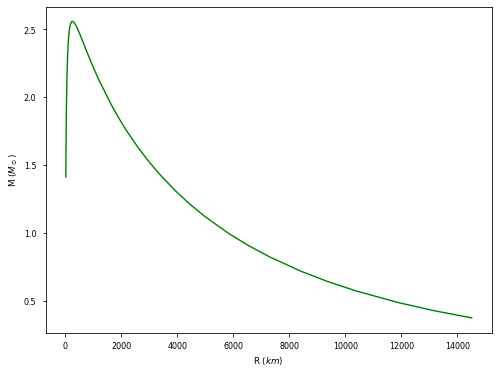

In [ ]:
plt.figure(figsize = (8,6))

plt.plot(WD_regimequalquer_TOV['R (km)'], WD_regimequalquer_TOV['m (Msol)'], color='green', ls='-')

#plt.axhline(y=1.4,color = 'black',linestyle='dashed') #Mch
#plt.annotate(r'M$_{ch}$ ', xy=(0,1.44),size = 10)

plt.xlabel(r"R $(km)$")
plt.ylabel(r"M ($M_\odot$)")
#plt.xlim(0,1.5)
#plt.ylim(0,25e+3)
#plt.gca().invert_yaxis()
#plt.xticks(np.arange(0,1.8,0.2),['0','0.2','0.4','0.6','0.8','1','1.2',r'M$_{Ch}$','1.6','1.8'])
#plt.annotate(r'Sirius B', xy=(3500, 1.02))
#plt.annotate(r'Procyon B', xy=(6570, 0.55))
#plt.ylim(0,3)
#plt.legend(loc=1,prop = {'size':10})
plt.savefig('mass-radii_WD.png')

###Parsons et al. (2017)

In [ ]:
dados_parsons = pd.DataFrame(columns=['massa (Msol)','raio (Rsol)','massa_erro','raio_erro'])
dados_parsons['massa (Msol)'] = 0.4756,0.4164,0.6579,0.4817,0.4475,0.5340,0.4406,0.4656,0.5964,0.5338,0.4146,0.6050,0.6098,0.3916,0.3977,0.4356
dados_parsons['massa_erro'] = 0.0036,0.0356,0.0097,0.0077,0.0015,0.0090,0.0144,0.0091,0.0088,0.0038,0.0036,0.0079,0.0031,0.0234,0.0220,0.0016
dados_parsons['raio (Rsol)'] = 0.01749,0.02521,0.01221,0.01578,0.01568,0.01398,0.01747,0.01840,0.01594,0.01401,0.01768,0.01278,0.01207,0.01800,0.01975,0.01570
dados_parsons['raio_erro'] = 0.00028, 0.00170,0.00046,0.00039,0.00009,0.00070,0.00083,0.00036,0.00022,0.00032,0.00020,0.00037,0.00061,0.00052,0.00050,0.00036

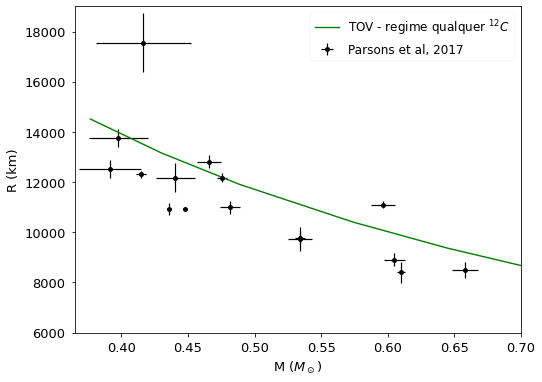

In [ ]:
plt.figure(figsize = (8,6))

plt.errorbar(dados_parsons['massa (Msol)'], dados_parsons['raio (Rsol)']*Rsol, color = 'red', 
             xerr = dados_parsons['massa_erro'], yerr = dados_parsons['raio_erro']*Rsol,
             fmt = 'ok', elinewidth = 1.2, label = 'Parsons et al, 2017',ms=5)
#plt.plot(WD_naorel['massa (Msol)'], WD_naorel['R (Rsol)'], color='blue', label = 'NEWTON - regime não-relativístico $^{12}C$',ls=':')
#plt.plot(WD_regimequalquer_NEWTON['massa (Msol)'], WD_regimequalquer_NEWTON['R (Rsol)'], color='blue', ls = '-',lw = 1.2, label = 'NEWTON - regime qualquer $^{12}C$')
#plt.plot(WD_regimequalquer_TOV_He['massa (Msol)'], WD_regimequalquer_TOV_He['R (Rsol)'], color='black', ls = '-',lw = 1.2, label = 'TOV - regime qualquer $^{4}He$')
plt.plot(WD_regimequalquer_TOV['m (Msol)'], WD_regimequalquer_TOV['R (km)'], color='green', label = 'TOV - regime qualquer $^{12}C$')

#plt.axvline(x=1.4,color = 'black',linestyle='dashed') #Mch
#plt.annotate(r'M$_{ch}$ ', xy=(1.42,0.0072),size = 10)

plt.xticks(size = 13)
plt.yticks(size = 13)

plt.ylabel(r"R (km)",size = 13)
plt.xlabel(r"M ($M_\odot$)",size = 13)
plt.ylim(6e+3,19e+3)
plt.xlim(0.365,0.7)
#plt.gca().invert_yaxis()
#plt.xticks(np.arange(0,1.8,0.2),['0','0.2','0.4','0.6','0.8','1','1.2',r'M$_{Ch}$','1.6','1.8'])
#plt.annotate(r'Sirius B', xy=(3500, 1.02))
#plt.annotate(r'Procyon B', xy=(6570, 0.55))

plt.legend(loc=1,prop = {'size':12})
plt.savefig('teorico-observacionais_WD.png')